# Machine Learning and Linear Regression
## By Lu and Cecilia



Objective: Use a training set of data to find a function to predict sale prices in the housing market.
            
            Price(x1,x2) = w1x1 + w2x2 + b

Methods: Use gradient descent to find values for w1, w2, and b that minimizes error; create a function which uses these values to predict other housing prices.

Features: Lot Area, Year Built

Label: Sale Price

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')

In [3]:
df[:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
price = df[['YearBuilt','LotArea','SalePrice']]
price[:3]

,YearBuilt,LotArea,SalePrice
0,2003,8450,208500
1,1976,9600,181500
2,2001,11250,223500


In [5]:
m = len(price)
x0 = np.ones(m,dtype=int) #creates another array for ones
x1 = df['LotArea'].values
x2 = df['YearBuilt'].values
y = df['SalePrice'].values

Iterative Method: start with a guess, w1 = 5; w2 = 0; b = 3

In [6]:
X = np.array([x1, x2, x0]).T
W = np.array([5, 0,  3]) 
Y = np.array(y)

In [7]:
X

array([[ 8450,  2003,     1],
       [ 9600,  1976,     1],
       [11250,  2001,     1],
       ...,
       [ 9042,  1941,     1],
       [ 9717,  1950,     1],
       [ 9937,  1965,     1]])

In [8]:
Y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [9]:
def loss(W,X,Y):
    n = len(y)
    return np.sum(((np.dot(X,W)-Y)**2)/n)

In [10]:
X*W

array([[42250,     0,     3],
       [48000,     0,     3],
       [56250,     0,     3],
       ...,
       [45210,     0,     3],
       [48585,     0,     3],
       [49685,     0,     3]])

In [11]:
loss(W,X,Y)


23174675956.922607

In [12]:
#Gradient descent, find partial derivatives 
def dw1(Y,x1,X,W):
    return np.sum(2*(np.dot((np.dot(X,W)-Y),x1)))
def dw2(Y,x2,X,W):
    return np.sum(2*(np.dot((np.dot(X,W)-Y),x2)))
def db(Y,X,W):
    return np.sum(2*(np.dot((np.dot(X,W)-Y),1)))


In [13]:
dw1(Y,x1,X,W)

-3097967893494

In [14]:
dw2(Y, x2, X, W)

-742302365654

In [15]:
db(Y,X,W)

-374735442

In [16]:
DW = np.array([dw1(Y,x1,X,W),dw2(Y, x2, X, W)
,db(Y,X,W)])
DW

array([-3097967893494,  -742302365654,     -374735442])

We need to add some fraction of the gradient's magnitude to find the new w1, w2, and b.

In [17]:
stepsize = 1/1000000
W = W - DW * stepsize

In [18]:
print(W)
loss(W,X,Y)

[8.09796789 0.74230237 3.00037474]


18338216648.62051

In [19]:
def runML(numberofsteps,sizeofstep,W):
    l=[]
    for i in range(numberofsteps):
        DW = np.array([dw1(Y,x1,X,W),dw2(Y, x2, X, W),db(Y,X,W)])
        W = W - DW * stepsize
        l.append(loss(W,X,Y))
        #print(loss(W,X,Y))
        #print(W)
    plt.plot(l)
    return W
    

This graph runs our program 1,000 times with a step size of 1/1000000.

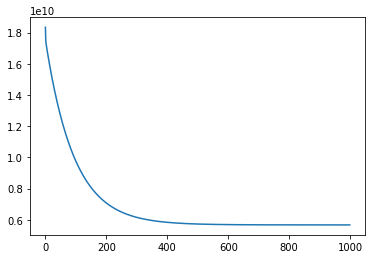

In [20]:
a=runML(1000,1/1000000,[5,0,3])

array([ 2.03390869, 81.22701756,  3.03772533])

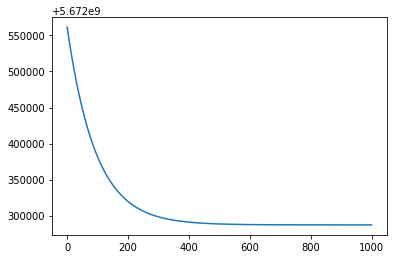

In [21]:
runML(1000,1/1000000,a)

In [22]:
a

array([ 2.07235748, 80.84071102,  3.03926401])

**Answer: price(x1,x2) = 2.07x1 + 80.84x2 + 3.03**

New Loss = 5672286985.598226

Original Loss = 23174675956.922607

Original w1, w2, b = [5,0,3]

Text(0.5,0.92,'Linear Regression Model for Housing Prices')

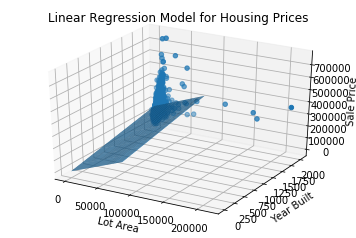

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

w1,w2,b=2.07,80.84,3.04

x = np.linspace(0,80000,50)
y = np.linspace(0,2020,10)

X,Y = np.meshgrid(x,y)
Z = (b + w1*X + w2*Y) 

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)

ax.scatter(df['LotArea'].values, df['YearBuilt'].values, df['SalePrice'].values)

ax.set_xlabel('Lot Area')
ax.set_ylabel('Year Built')
ax.set_zlabel('Sale Price')
ax.set_title('Linear Regression Model for Housing Prices')